# Лабораторная работа № 3. Титаник

На основе данных конкурса [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) постройте модель логистической регрессии для предсказания выживших пассажиров.

## Задание

1. Постройте классификатор используя доступные числовые признаки.
2. Оцените точность и полноту классификации. Постройте график ROC кривой.
3. Расширьте пространство признаков на основе имени пассажира и оцените качество новой модели.

## Пункт 1

Откроем дата сет, сделаем массив с числовыми признаками, целевой переменной будет то, выжил ли пассажир, уберём NaN'ы из датасета и создадим модель логистической регрессии, которая будет предсказывать то, выжил ли человек или нет.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, auc, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [2]:
data_train = pd.read_csv("C:/Users/Kirill/Downloads/train.csv", index_col="PassengerId")
data_test = pd.read_csv("C:/Users/Kirill/Downloads/test.csv", index_col="PassengerId")
survived_data = pd.read_csv("C:/Users/Kirill/Downloads/gender_submission.csv", index_col="PassengerId")

data_test.insert(loc = 0, column = 'Survived', value = survived_data['Survived'])

num_cols = [
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'
]

other1_cols = [
    'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'
]


data_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
data_train_num = data_train
for col in other1_cols:
    data_train_num = data_train_num.drop(columns = [col])
data_train_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [4]:
data_test_num = data_test
for col in other1_cols:
    data_test_num = data_test_num.drop(columns = [col])
data_test_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
892,0,3,34.5,0,0,7.8292
893,1,3,47.0,1,0,7.0000
894,0,2,62.0,0,0,9.6875
895,0,3,27.0,0,0,8.6625
896,1,3,22.0,1,1,12.2875


In [5]:
data_test_num = data_test_num.dropna()
data_test_num.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [6]:
data_train_num = data_train_num.dropna()
data_train_num.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [7]:
X_train = data_train_num.drop(columns = ['Survived'])
X_test = data_test_num.drop(columns = ['Survived'])
y_train = data_train_num['Survived']
y_test = data_test_num['Survived']

In [8]:
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [9]:
y_pred = log_reg.predict(X_test)

## Пункт 2

Посчитаем точность и полноту модели

In [10]:
print("Точность=", precision_score(y_test, y_pred))
print("Полнота=", recall_score(y_test, y_pred))

Точность= 0.475
Полнота= 0.44881889763779526


Построим ROC кривую для данной модели

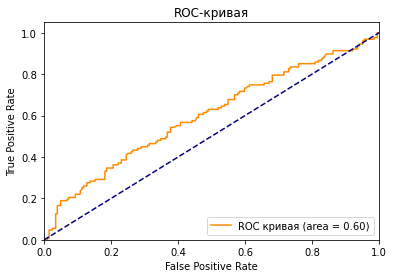

In [11]:
y_prob = log_reg.predict_proba(X_test)[:,1]

lr_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, treshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

## Пункт 3

Титул в имени человека зачастую показывал его классовую принадлежность, а также то, женат человек или нет. Поэтому добавим ещё один признак, в котором будет отражаться титул человека.

In [12]:
combine = [data_train, data_test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(data_train['Title'], data_train['Sex'])

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


In [13]:
data_test_num2 = data_test
for col in other1_cols:
    data_test_num2 = data_test_num2.drop(columns = [col])
data_train_num2 = data_train
data_train_num2 = data_train_num2.dropna()
for col in other1_cols:
    data_train_num2 = data_train_num2.drop(columns = [col])
data_test_num2 = data_test_num2.dropna()

Создадим модель линейной регрессии

In [14]:
X_train = data_train_num2.drop(columns = ['Survived'])
y_train = data_train_num2['Survived']
X_test = data_test_num2.drop(columns = ['Survived'])
y_test = data_test_num2['Survived']

In [15]:
other_log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
y_pred = log_reg.predict(X_test)

Посчитаем точность и полноту модели

In [17]:
print("Точность=", precision_score(y_test, y_pred))
print("Полнота=", recall_score(y_test, y_pred))

Точность= 0.7167630057803468
Полнота= 0.9763779527559056


Построим ROC-кривую для данной модели

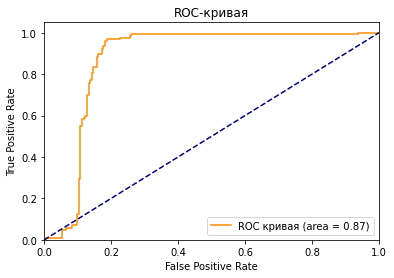

In [18]:
y_prob = log_reg.predict_proba(X_test)[:,1]

lr_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, treshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [ ]:
## Выо